In [15]:
import torch
x = torch.randn(2, 3, 1)
y = x.squeeze()
z = y.unsqueeze(0)

print(x)
print(x.shape)
print(y)
print(y.shape)
print(z)
print(z.shape)


tensor([[[-1.6239],
         [-1.4657],
         [ 0.3377]],

        [[-0.6762],
         [ 0.9190],
         [ 0.8381]]])
torch.Size([2, 3, 1])
tensor([[-1.6239, -1.4657,  0.3377],
        [-0.6762,  0.9190,  0.8381]])
torch.Size([2, 3])
tensor([[[-1.6239, -1.4657,  0.3377],
         [-0.6762,  0.9190,  0.8381]]])
torch.Size([1, 2, 3])


In [18]:
y = x.squeeze()
print(y)
print(y.shape)

tensor([[-1.6239, -1.4657,  0.3377],
        [-0.6762,  0.9190,  0.8381]])
torch.Size([2, 3])


In [19]:
z = y.unsqueeze(0)
print(z)

tensor([[[-1.6239, -1.4657,  0.3377],
         [-0.6762,  0.9190,  0.8381]]])


In [21]:
x = torch.randn(2, 3, 4)
y = x.view(3, 8)
print(x)
print(x.shape)

print(y)
print(y.shape)


tensor([[[ 1.6399, -0.3052, -0.4246, -0.2124],
         [ 0.6172,  2.5768, -1.6174, -0.0923],
         [-0.5585, -1.2383,  0.3495,  1.2307]],

        [[ 0.3850, -1.6808, -1.4819,  0.6195],
         [ 0.6591, -0.8981, -0.5231,  2.1905],
         [ 1.8779,  0.9988,  0.4247, -0.1658]]])
torch.Size([2, 3, 4])
tensor([[ 1.6399, -0.3052, -0.4246, -0.2124,  0.6172,  2.5768, -1.6174, -0.0923],
        [-0.5585, -1.2383,  0.3495,  1.2307,  0.3850, -1.6808, -1.4819,  0.6195],
        [ 0.6591, -0.8981, -0.5231,  2.1905,  1.8779,  0.9988,  0.4247, -0.1658]])
torch.Size([3, 8])


In [ ]:
import torch
x = torch.randn([1, 2, 3], requires_grad=True)
y = x ** 2 + 3 * x
y.backward()
print(x.grad)


RuntimeError: grad can be implicitly created only for scalar outputs

In [40]:
epch = 10

x = torch.randn([10, 1])
y = 3 * x + 2
rate = 0.1
w = torch.randn([1], requires_grad=True)
b = torch.randn([1], requires_grad=True)

for i in range(epch):
    y_pred = w * x + b
    loss = (y_pred - y).pow(2).mean()
    loss.backward()
    print("w.grad, b.grad", w.grad, b.grad)
    print("y_pred, w, b", y_pred[0], w.data[0], b.data[0])
    print("loss", loss)
    with torch.no_grad():
        print("w.grad, b.grad", w.grad, b.grad)
        w -= rate * w.grad
        b -= rate * b.grad
        w.grad.zero_()
        b.grad.zero_()
        print("w.grad, b.grad", w.grad, b.grad)
        print("-"*100)
print(w, b)


w.grad, b.grad tensor([-7.1660]) tensor([-7.2158])
y_pred, w, b tensor([-0.7289], grad_fn=<SelectBackward0>) tensor(-0.0436) tensor(-0.7003)
loss tensor(20.6478, grad_fn=<MeanBackward0>)
w.grad, b.grad tensor([-7.1660]) tensor([-7.2158])
w.grad, b.grad tensor([0.]) tensor([0.])
----------------------------------------------------------------------------------------------------
w.grad, b.grad tensor([-5.4277]) tensor([-5.3453])
y_pred, w, b tensor([0.4617], grad_fn=<SelectBackward0>) tensor(0.6730) tensor(0.0213)
loss tensor(11.6036, grad_fn=<MeanBackward0>)
w.grad, b.grad tensor([-5.4277]) tensor([-5.3453])
w.grad, b.grad tensor([0.]) tensor([0.])
----------------------------------------------------------------------------------------------------
w.grad, b.grad tensor([-4.1182]) tensor([-3.9525])
y_pred, w, b tensor([1.3515], grad_fn=<SelectBackward0>) tensor(1.2157) tensor(0.5558)
loss tensor(6.5280, grad_fn=<MeanBackward0>)
w.grad, b.grad tensor([-4.1182]) tensor([-3.9525])
w.grad, b

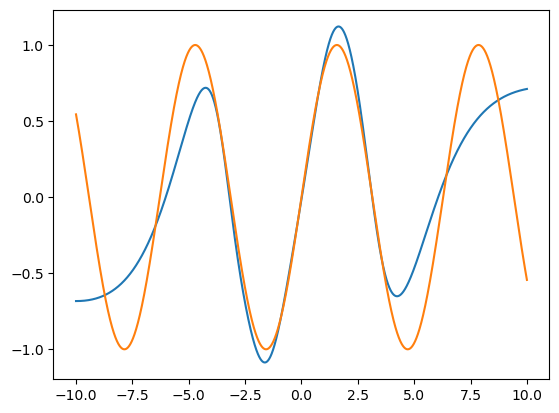

In [18]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x = torch.linspace(-10, 10, 10000).unsqueeze(-1)
y = torch.sin(x)


for epoch in range(10000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = model(x)

plt.plot(x, y_pred.detach().numpy())
plt.plot(x, y.numpy())
plt.show()


In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


x = torch.linspace(0, 4, 10000).unsqueeze(-1)
y = torch.sin(3 * x)



In [37]:

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



In [41]:
dataset = MyDataset(x, y)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

for i in range(100):
    for batch_x, batch_y in dataloader:
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
x = x.to(device)
y = y.to(device)
dataset = MyDataset(x, y)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

for i in range(100):
    for batch_x, batch_y in dataloader:
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


cuda


In [ ]:
dataset = MyDataset(x, y)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False)



In [ ]:



from turtle import forward


class FeatureEncoder(nn.Module):
    def __init__(self):
        genderEncoder = nn.Embedding(2, 4)
        cityEncoder = nn.Embedding(4, 8)
    
    def forward(self, x):
        gender = self.genderEncoder(x[0])
        city = self.cityEncoder(x[1])
        age = x[2]
        income = x[3]
        return torch.cat([gender, city, age, income], dim=1)





